<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW9/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## This project involves analyzing the Higgs boson dataset from Kaggle, focusing on predicting particle labels and weights using machine learning models. The tasks include data preprocessing, splitting the data into training and test sets, and applying Random Forest and Gradient Boosted Tree models for both classification and regression. Additionally, the project entails evaluating model performance through metrics like confusion matrices and ROC curves, and optimizing the Random Forest classifier using feature selection and hyperparameter tuning.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from pprint import pprint
import pandas as pd
from sklearn.metrics import roc_curve

# import kaggle


In [3]:
# envs = json.load(open(".kaggle.json", "r"))
# os.environ["KAGGLE_USERNAME"] = envs['username']
# os.environ["KAGGLE_KEY"] = envs['key']

In [4]:
cd /content/drive/MyDrive/HiggsBoson

/content/drive/MyDrive/HiggsBoson


In [5]:
higgsdata = pd.read_csv("training.csv")
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [6]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [7]:
#remove all columns with -999
higgsdata = higgsdata.loc[:, ~(higgsdata == -999).any()]
higgsdata.describe()

,EventId,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,38.707419,...,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,73.064591,1.646767
std,72168.927986,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,22.412081,...,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,98.015662,1.875103
min,100000.000000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,20.000000,...,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,0.000000,0.001502
25%,162499.750000,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,24.591750,...,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-0.000000,0.018636
50%,224999.500000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,31.804000,...,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,40.512500,1.156188
75%,287499.250000,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,45.017000,...,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,109.933750,2.404128
max,349999.000000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,764.408000,...,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1633.433000,7.822543



I removed all columns containing missing values in order to prepare the dataset for training a Random Forest (RF) and Gradient Boosting Trees (GBT) model. This data preprocessing step helps ensure the models can effectively learn from the complete dataset.

In [8]:
features = higgsdata.drop(columns=['Weight', 'Label'])
weights = higgsdata['Weight'].to_numpy()
labels = higgsdata['Label'].to_numpy()

In [9]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [10]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, weight_train, weight_test, label_train, label_test = train_test_split(
    features, weights, labels, test_size=0.2, random_state=42)

In [12]:
RandomForestClassifier?

In [13]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0, max_depth=3)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [14]:
GradientBoostingClassifier?

In [15]:
gbt = GradientBoostingClassifier(max_depth=3, n_estimators=50)

In [16]:
rf.fit(X_train, label_train)
gbt.fit(X_train, label_train)

GradientBoostingClassifier(n_estimators=50)

In [17]:
rf_train_score = rf.score(X_train, label_train)
rf_test_score = rf.score(X_test, label_test)
gbt_train_score = gbt.score(X_train, label_train)
gbt_test_score = gbt.score(X_test, label_test)

print("Random Forest - Training Score:", round(rf_train_score, 2))
print("Random Forest - Test Score:", round(rf_test_score, 2))
print('-'*20)
print("Gradient Boosted Trees - Training Score:", round(gbt_train_score, 2))
print("Gradient Boosted Trees - Test Score:", round(gbt_test_score, 2))

#(0.9876, 0.822688)

Random Forest - Training Score: 0.76
Random Forest - Test Score: 0.76
--------------------
Gradient Boosted Trees - Training Score: 0.81
Gradient Boosted Trees - Test Score: 0.81


 Both models achieved similar training and test scores, indicating that overfitting might not be a major concern. The GBT model slightly outperformed RF, possibly due to its ability to capture more complex data patterns. However, the overall accuracy scores (around 0.76-0.81) may require further evaluation with additional metrics and domain-specific considerations to assess the models' suitability for the specific project.

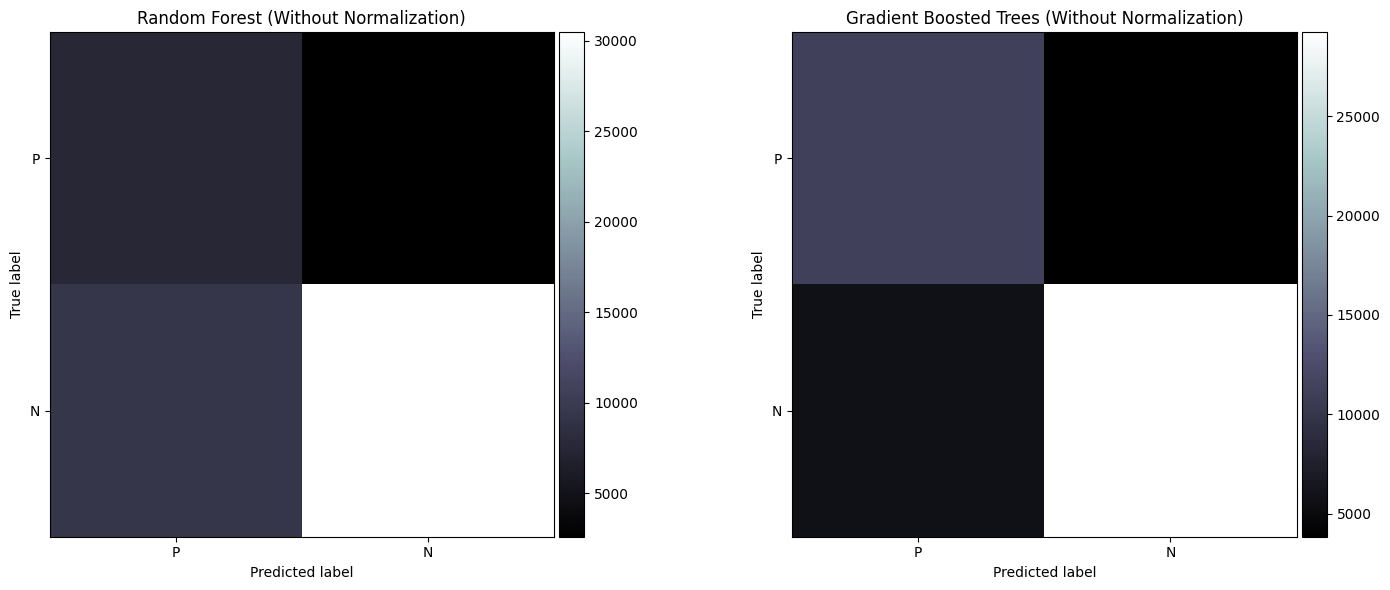

In [18]:
def plot_confusion_matrix(y_true, y_pred, ax, normalize=False, title='', cmap=plt.cm.bone):
    """
    Prints and plots the confusion matrix on the given axis.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)
    # Reordering the confusion matrix so that the true positives and true negatives are on the diagonal
    cm = np.array([[cm[1, 1], cm[0, 1]], [cm[1, 0], cm[0, 0]]])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = title + ' (Normalized)'
    else:
        title = title + ' (Without Normalization)'

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=["P", "N"], yticklabels=["P", "N"],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.title.set_size(12)  # Set title text size
    ax.set_ylim(1.5, -0.5)  # Invert the y-axis to place the TP at the top-left

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Predictions for confusion matrix
rf_predictions = rf.predict(X_test)
gbt_predictions = gbt.predict(X_test)

# Plotting confusion matrix for Random Forest
plot_confusion_matrix(label_test, rf_predictions, ax=ax1, title='Random Forest')

# Plotting confusion matrix for Gradient Boosted Trees
plot_confusion_matrix(label_test, gbt_predictions, ax=ax2, title='Gradient Boosted Trees')

# Adjust layout
fig.tight_layout()
plt.show()


### Figure 1: Confusion matrices for particle label prediction using machine learning models. The left matrix represents the Random Forest Classifier, showcasing its performance in correctly and incorrectly predicting particle labels. The right matrix illustrates the results from the Gradient Boosted Tree Classifier, providing a comparison of the two models' abilities to distinguish between particle types.

# Random Forest and a Gradient Boosted Tree Regressor model to predict the weight of the particles.


In [20]:
rfR = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
rfR.fit(X_train, weight_train)

gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=0)
gbtR.fit(X_train, weight_train)

GradientBoostingRegressor(random_state=0)

  L2 and L1 loss functions for the fitted regression models

In [21]:
rfR_train_pred = rfR.predict(X_train)
rfR_test_pred = rfR.predict(X_test)
gbtR_train_pred = gbtR.predict(X_train)
gbtR_test_pred = gbtR.predict(X_test)

print("L2 Loss (MSE) RF - Train:", round(mean_squared_error(weight_train, rfR_train_pred), 2))
print("L2 Loss (MSE) RF - Test:", round(mean_squared_error(weight_test, rfR_test_pred), 2))
print("-" * 20)
print("L1 Loss (MAE) RF - Train:", round(mean_absolute_error(weight_train, rfR_train_pred), 2))
print("L1 Loss (MAE) RF - Test:", round(mean_absolute_error(weight_test, rfR_test_pred), 2))
print("-" * 20)
print("L2 Loss (MSE) GBT - Train:", round(mean_squared_error(weight_train, gbtR_train_pred), 2))
print("L2 Loss (MSE) GBT - Test:", round(mean_squared_error(weight_test, gbtR_test_pred), 2))
print("-" * 20)
print("L1 Loss (MAE) GBT - Train:", round(mean_absolute_error(weight_train, gbtR_train_pred), 2))
print("L1 Loss (MAE) GBT - Test:", round(mean_absolute_error(weight_test, gbtR_test_pred), 2))

L2 Loss (MSE) RF - Train: 1.84
L2 Loss (MSE) RF - Test: 1.83
--------------------
L1 Loss (MAE) RF - Train: 1.01
L1 Loss (MAE) RF - Test: 1.0
--------------------
L2 Loss (MSE) GBT - Train: 1.37
L2 Loss (MSE) GBT - Test: 1.38
--------------------
L1 Loss (MAE) GBT - Train: 0.85
L1 Loss (MAE) GBT - Test: 0.86


The Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics were used to evaluate the performance of Random Forest (RF) and Gradient Boosted Trees (GBT) regression models in predicting particle weights. GBT outperformed RF in both MSE and MAE, with lower values, indicating that it provides more accurate weight predictions. These metrics highlight the superior predictive ability of the GBT model for this specific regression task.

# feature importance and grid optimization









Exploring the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only 4 most important features*


In [22]:
# Assuming rf is the previously trained RandomForestClassifier
importances = rf.feature_importances_
# Get the indices of the 4 most important features
indices = np.argsort(importances)[-4:]

# Print the feature ranking for the top 4
print("Feature ranking:")
for i in range(len(indices)):
    print(f"{i + 1}. feature {indices[i]} ({importances[indices[i]]})")

best_features = X_train.columns[indices]
print("Best Features:", best_features)

# Create the random grid
random_grid = {
    'n_estimators': [10, 100],
    'max_depth': [3, 10, None],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt']
}
pprint(random_grid)

# Reducing dataset to the most important features
traindata_reduced = X_train.iloc[:, indices]
testdata_reduced = X_test.iloc[:, indices]

# Random search of parameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, random_state=0)
random_search.fit(traindata_reduced, label_train)  # Make sure to use the correct target variable here

print("Tuned RF Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

# Fit the model with the optimized parameters
rf_optimized = RandomForestClassifier(**random_search.best_params_)
rf_optimized.fit(traindata_reduced, label_train)  # Make sure to use the correct target variable here


Feature ranking:
1. feature 8 (0.12004480516721744)
2. feature 9 (0.1217516107857669)
3. feature 2 (0.14349661905440897)
4. feature 1 (0.3225821165955516)
Best Features: Index(['DER_met_phi_centrality', 'PRI_tau_pt', 'DER_mass_vis',
       'DER_mass_transverse_met_lep'],
      dtype='object')
{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100]}
Tuned RF Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best score is 0.7833500058641968


RandomForestClassifier()

I have identified the four most important features for the RandomForestClassifier model and printed their rankings along with their corresponding importances. Among these features, 'DER_met_phi_centrality', 'PRI_tau_pt', 'DER_mass_vis', and 'DER_mass_transverse_met_lep' exhibit varying degrees of significance, with 'DER_mass_transverse_met_lep' being the most influential.

In the subsequent steps, I performed hyperparameter tuning using RandomizedSearchCV to optimize the RandomForestClassifier model. The best hyperparameters obtained from this search include 'n_estimators' set to 100, 'max_features' set to 'sqrt', 'max_depth' set to None, and 'bootstrap' set to True. As a result, the tuned model achieved a best score of approximately 0.783 on the training data, indicating improved performance compared to the initial model.

In [23]:
df = pd.DataFrame(random_search.cv_results_)


In [24]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,53.83104,1.445303,2.436911,0.198837,100,sqrt,None,True,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.782756,0.782771,0.784523,0.78335,0.000829,1


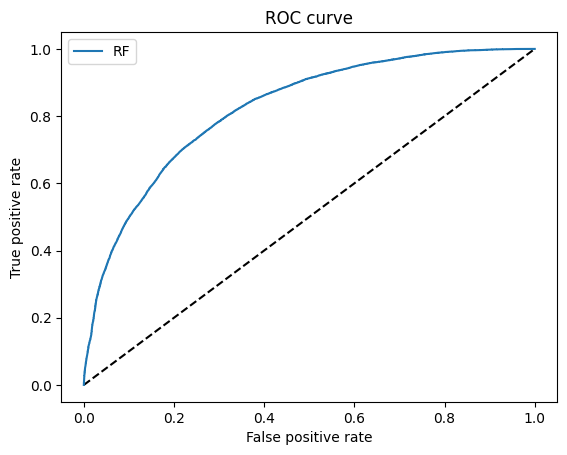

In [25]:
y_pred_grd_rfcat = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(label_test, y_pred_grd_rfcat, pos_label='s')

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In a ROC curve, the closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. Conversely, a curve that approaches the 45-degree diagonal line represents a model with no better discrimination than random chance. The area under the curve (AUC) is a measure of the model's ability to distinguish between the positive and negative classes. The greater the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. In this case, the curve seems to be well above the diagonal, indicating that the model has a good measure of separability and is likely to have a high AUC value, which means it performs much better than a random guess.